## Import data

In [1]:
from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
x_train.shape

(8982,)

In [3]:
x_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [4]:
y_train.shape

(8982,)

In [5]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [6]:
import numpy as np

len(np.unique(y_train))

46

## Vectorize X

In [7]:
import numpy as np

def one_hot_encode_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = one_hot_encode_sequences(x_train)
x_test = one_hot_encode_sequences(x_test)

In [9]:
x_train.shape

(8982, 10000)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## Vectorize Y

In [11]:
import numpy as np

def one_hot_encode_labels(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [2]:
# from keras.utils.np_utils import to_categorical

# one_hot_train_labels = to_categorical(y_train)
# one_hot_test_labels = to_categorical(y_test)

In [12]:
y_train = one_hot_encode_labels(y_train)
y_test = one_hot_encode_labels(y_test)

In [13]:
y_train.shape

(8982, 46)

In [14]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Train-validation split

In [15]:
split_at = 1000

x_val = x_train[:split_at]
y_val = y_train[:split_at]

partial_x_train = x_train[split_at:]
partial_y_train = y_train[split_at:]

## Build the model

In [16]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[-1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizers.RMSprop(lr=0.001), 
              losses.categorical_crossentropy, 
              [metrics.categorical_accuracy])

## Train the model, find the optimal epoch

In [18]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    batch_size=512, 
                    epochs=20, 
                    validation_data=(x_val, y_val),
                    verbose=0)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 160us/step - loss: 2.5322 - categorical_accuracy: 0.4955 - val_loss: 1.7208 - val_categorical_accuracy: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 126us/step - loss: 1.4452 - categorical_accuracy: 0.6879 - val_loss: 1.3459 - val_categorical_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.0953 - categorical_accuracy: 0.7651 - val_loss: 1.1708 - val_categorical_accuracy: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.8697 - categorical_accuracy: 0.8165 - val_loss: 1.0793 - val_categorical_accuracy: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.7034 - categorical_accuracy: 0.8472 - val_loss: 0.9844 - val_categorical_accuracy: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.5667 - categorical_acc

In [19]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

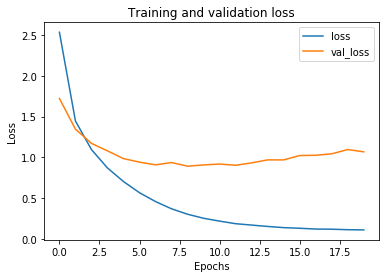

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

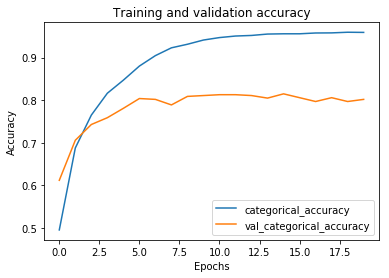

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history.epoch, history.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Re-train the model using optimal num_epochs

In [23]:
optimal_num_epochs = 9

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[-1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizers.RMSprop(lr=0.001), 
              losses.categorical_crossentropy, 
              [metrics.categorical_accuracy])

model.fit(partial_x_train, 
                    partial_y_train, 
                    batch_size=512, 
                    epochs=optimal_num_epochs, 
                    validation_data=(x_val, y_val),
                    verbose=0)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 153us/step - loss: 2.6135 - categorical_accuracy: 0.4644 - val_loss: 1.7289 - val_categorical_accuracy: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 130us/step - loss: 1.4074 - categorical_accuracy: 0.7082 - val_loss: 1.2747 - val_categorical_accuracy: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 129us/step - loss: 1.0425 - categorical_accuracy: 0.7786 - val_loss: 1.1035 - val_categorical_accuracy: 0.7630
Epoch 4/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.8180 - categorical_accuracy: 0.8322 - val_loss: 1.0270 - val_categorical_accuracy: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 130us/step - loss: 0.6507 - categorical_accuracy: 0.8629 - val_loss: 0.9513 - val_categorical_accuracy: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.5297 - categorical_accuracy:

## Apply the model to test set to evaluate its performance

In [24]:
model.evaluate(x_test, y_test, batch_size=512)

2246/2246 [==============================] - 0s 88us/step


[0.98393748853213, 0.7858414966297914]

In [25]:
model.metrics_names

['loss', 'categorical_accuracy']

In [26]:
y_pred = model.predict(x_test)
y_pred

array([[9.43542473e-05, 4.51649794e-05, 9.66501648e-06, ...,
        7.44619028e-05, 2.81968878e-05, 3.73166904e-06],
       [1.97803136e-03, 2.27266371e-01, 1.94406002e-05, ...,
        2.27143220e-03, 6.52188755e-05, 1.11515669e-03],
       [3.17659578e-03, 8.17157805e-01, 5.89298957e-04, ...,
        1.35484221e-03, 2.96936632e-04, 2.84687761e-04],
       ...,
       [3.53586329e-05, 2.87334668e-04, 1.95602897e-05, ...,
        4.23459496e-05, 1.03075681e-05, 6.05685500e-06],
       [2.53466261e-03, 1.03894874e-01, 6.47467049e-03, ...,
        2.08587269e-03, 3.02017375e-04, 5.95839520e-04],
       [9.50003960e-05, 8.94641399e-01, 1.46866124e-03, ...,
        6.13890996e-04, 9.69596476e-06, 5.04090240e-05]], dtype=float32)

In [27]:
y_pred = np.argmax(y_pred, axis=-1)
y_pred

array([ 3, 10,  1, ...,  3,  3,  1], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
cm

array([[ 6,  3,  0, ...,  0,  0,  0],
       [ 0, 88,  0, ...,  0,  0,  0],
       [ 0,  2, 11, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [29]:
sum(cm.diagonal()) / len(y_test)

0.7858414959928762

In [30]:
# base line accuracy: random pred classes
import copy

y_test_copy = copy.copy(np.argmax(y_test, axis=-1))
np.random.shuffle(y_test_copy)
hits_arr = np.argmax(y_test, axis=-1) == np.array(y_test_copy)
sum(hits_arr) / len(y_test)

0.19056099732858414

## Try Network 2 : with Dense's nodes < num_classes

In [34]:
less_than_46 = 4

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[-1],)))
model.add(layers.Dense(less_than_46, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizers.RMSprop(lr=0.001), 
              losses.categorical_crossentropy, 
              [metrics.categorical_accuracy])

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    batch_size=512, 
                    epochs=20, 
                    validation_data=(x_val, y_val),
                    verbose=0)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 162us/step - loss: 3.3344 - categorical_accuracy: 0.3302 - val_loss: 2.8952 - val_categorical_accuracy: 0.3650
Epoch 2/20
7982/7982 [==============================] - 1s 128us/step - loss: 2.5871 - categorical_accuracy: 0.3795 - val_loss: 2.3468 - val_categorical_accuracy: 0.3780
Epoch 3/20
7982/7982 [==============================] - 1s 128us/step - loss: 2.1071 - categorical_accuracy: 0.3908 - val_loss: 2.0111 - val_categorical_accuracy: 0.3890
Epoch 4/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.8115 - categorical_accuracy: 0.5173 - val_loss: 1.7974 - val_categorical_accuracy: 0.5600
Epoch 5/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.6017 - categorical_accuracy: 0.6196 - val_loss: 1.6459 - val_categorical_accuracy: 0.6090
Epoch 6/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.4488 - categorical_acc

In [35]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

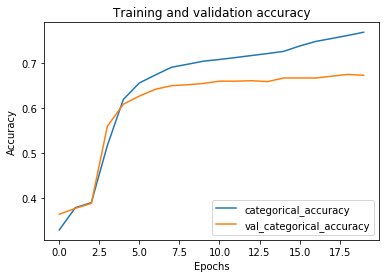

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history.epoch, history.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()